**Prediction Using Supervised ML**

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# Load the data
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [3]:
# Display the first few rows of the dataset
print(s_data.head())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


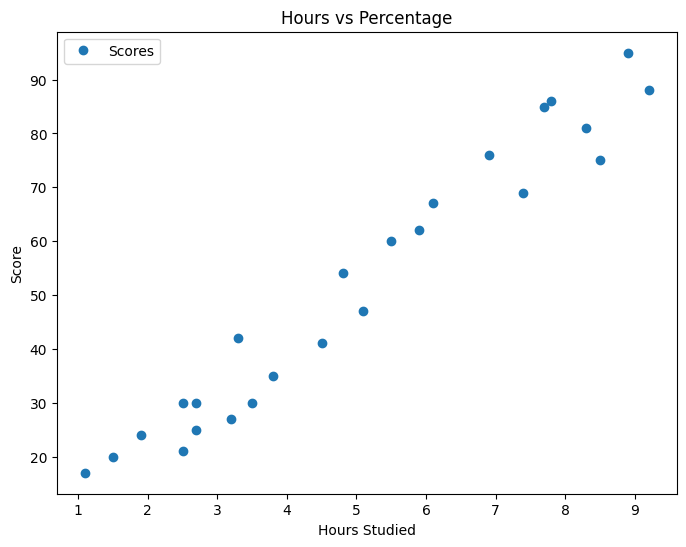

In [4]:
# EDA: Explore the dataset
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o', figsize=(8, 6))
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.show()

In [5]:
# Summary statistics
print(s_data.describe())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


In [6]:
# Split the data into training and testing sets
X = s_data.iloc[:, :-1].values
y = s_data.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
# Create a Linear Regression model and train it
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [8]:
# Testing data - In Hours
print("Testing data:")
print(X_test)

Testing data:
[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [9]:
# Predicting the scores
y_pred = regression.predict(X_test)

In [10]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nActual vs Predicted Scores:")
print(df)


Actual vs Predicted Scores:
   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


In [11]:
# You can also test with your own data
hours = np.array(9.25).reshape(-1, 1)
own_pred = regression.predict(hours)
print("\nPredicting for 9.25 hours:")
print("No of Hours = {}".format(9.25))
print("Predicted Score = {}".format(own_pred[0]))


Predicting for 9.25 hours:
No of Hours = 9.25
Predicted Score = 93.69173248737539


In [12]:
# Calculate and print Mean Absolute Error
mae = metrics.mean_absolute_error(y_test, y_pred)
print('\nMean Absolute Error:', mae)


Mean Absolute Error: 4.183859899002982


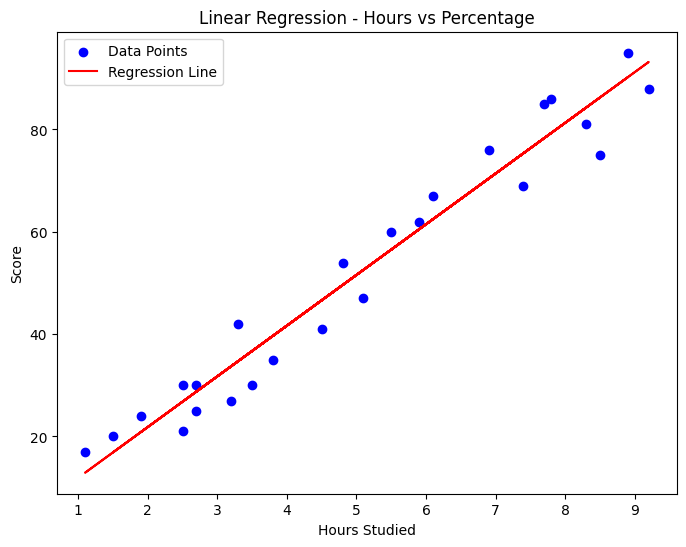

In [13]:
# Visualize the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, regression.predict(X), color='red', label='Regression Line')
plt.title('Linear Regression - Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.legend()
plt.show()